# lab-customer-analysis-round-4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.


**Use the jupyter file from the last lab (Customer Analysis Round 3)**

### 1. Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
**Hint**: You can use np.number and np.object to select the numerical data types and categorical data types respectively


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"files_for_lab\csv_files\marketing_customer_analysis.csv")
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [21]:
numerical = data._get_numeric_data().head()
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [22]:
categoricals = data.select_dtypes('object').head()
categoricals

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2. Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 


In [54]:
#???????
#fig, axes = plt.subplots(4, 2, figsize=(18, 10))
#sns.distplot(data["Customer Lifetime Value"]).ax=axes[0, 0]
#sns.distplot(data["Income"]).ax=axes[0, 1]
#tried to display multiple plots together but could not get it to work

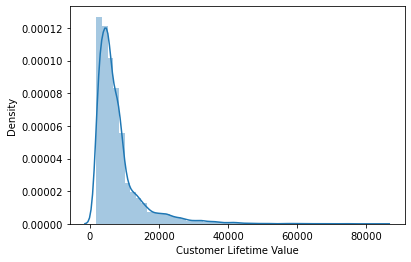

In [83]:
sns.distplot(data["Customer Lifetime Value"])
plt.show()

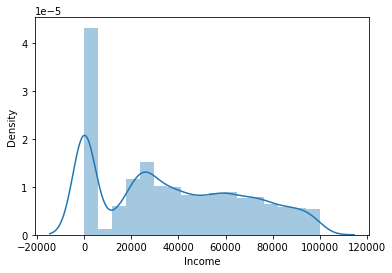

In [84]:
sns.distplot(data["Income"])
plt.show()

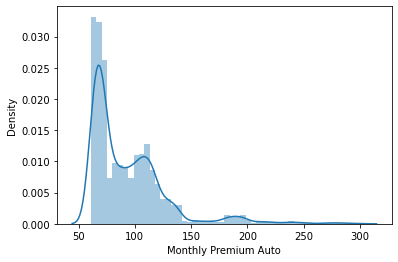

In [85]:
sns.distplot(data["Monthly Premium Auto"])
plt.show()

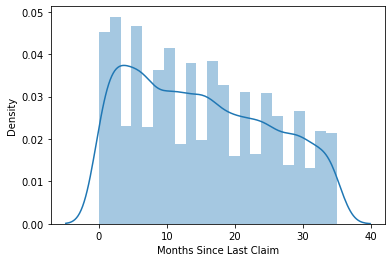

In [86]:
sns.distplot(data["Months Since Last Claim"])
plt.show()

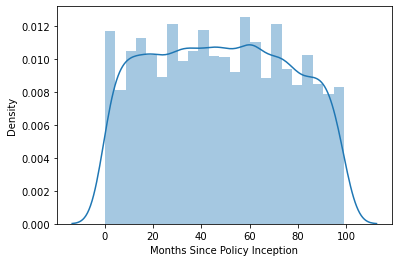

In [87]:
sns.distplot(data["Months Since Policy Inception"])
plt.show()

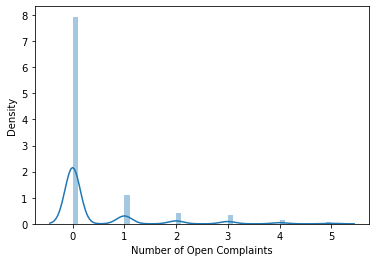

In [88]:
sns.distplot(data["Number of Open Complaints"])
plt.show()

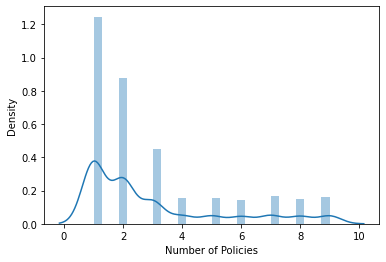

In [89]:
sns.distplot(data["Number of Policies"])
plt.show()

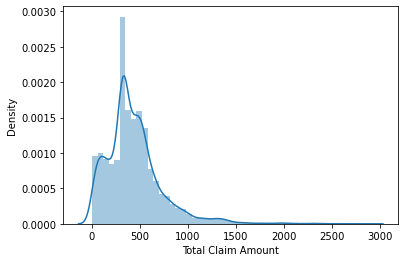

In [90]:
sns.distplot(data["Total Claim Amount"])
plt.show()

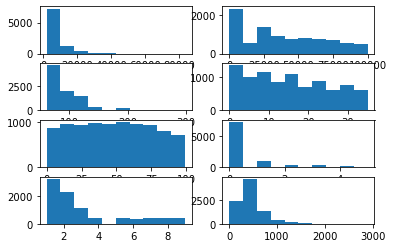

In [70]:
fig, axs = plt.subplots(4,2) 

axs[0, 0].hist(data['Customer Lifetime Value'])
axs[0, 1].hist(data['Income'])
axs[1, 0].hist(data['Monthly Premium Auto'])
axs[1, 1].hist(data['Months Since Last Claim'])
axs[2, 0].hist(data['Months Since Policy Inception'])
axs[2, 1].hist(data['Number of Open Complaints'])
axs[3, 0].hist(data['Number of Policies'])
axs[3, 1].hist(data['Total Claim Amount'])
plt.show()

In [ ]:
#Do the distributions for different numerical variables look like a normal distribution - NO

### 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 


In [82]:
X = numerical.drop(['Total Claim Amount'], axis=1)
y = numerical['Total Claim Amount']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())

#[3] The condition number is large, 1.33e+04. This might indicate that there are 
#strong multicollinearity or other numerical problems.

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 08 Jun 2021   Prob (F-statistic):                nan
Time:                        23:31:09   Log-Likelihood:                 121.24
No. Observations:                   5   AIC:                            -232.5
Df Residuals:                       0   BIC:                            -234.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [98]:
X.corr()

,const,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Lifetime Value,NaN,1.000000,-0.169330,0.908246,-0.246800,0.369967,NaN,0.261831
Income,NaN,-0.169330,1.000000,-0.523098,0.494943,-0.719870,NaN,-0.976883
Monthly Premium Auto,NaN,0.908246,-0.523098,1.000000,-0.364438,0.660381,NaN,0.570025
Months Since Last Claim,NaN,-0.246800,0.494943,-0.364438,1.000000,-0.753960,NaN,-0.397124
Months Since Policy Inception,NaN,0.369967,-0.719870,0.660381,-0.753960,1.000000,NaN,0.604917
Number of Open Complaints,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Policies,NaN,0.261831,-0.976883,0.570025,-0.397124,0.604917,NaN,1.000000


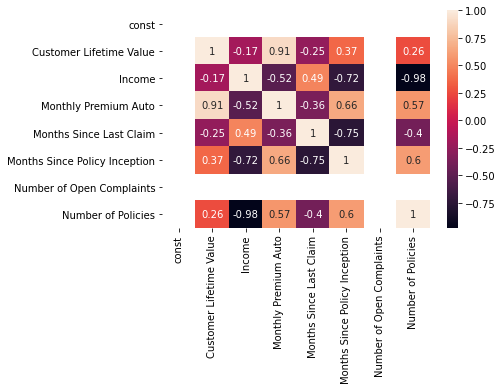

In [99]:
corr_data = X.select_dtypes([np.number])
correlations_matrix = corr_data.corr()
correlations_matrix

sns_plot = sns.heatmap(correlations_matrix, annot=True)
figure = sns_plot.get_figure()    
plt.show()